# Lab 4

by Vsevolod Klyushev

## Task 1

Confirm by simulations the Thin-Shell Theorem for Gaussian vectors. More precisely, obtain by simulations
the following probability:
$$Pr\{(\|X\|_2 \leq (1-\delta)\sqrt{n})\ \cup \ (\|X\|_2 \geq (1+\delta)\sqrt{n})\}$$

where $X = [X_1, X_2, ..., X_n]$, where $X_i$, for $i = 1, 2, ..., n$, are i.i.d. zero-mean unit-variance Gaussian RVs,
and plot it as a function of $n$ for 3 different values of $\delta$.

Then, on the same figure, plot the theoretical bound of (1) for the same of values $\delta$ and as a function of $n$ for a well chosen $k$. What is the best $k$ that you can come up with such that the theoretical bound is tightest?

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def generate_values(n, mean=0, std=1):
    return np.random.normal(mean, std, n)

def get_norm(X):
    return np.sqrt(np.sum([x**2 for x in X]))

def get_simulation_results_left(norms, delta, n):
    return np.sum([float(val <= (1-delta) * np.sqrt(n)) for val in norms]) / len(norms)

def get_simulation_results_right(norms, delta, n):
    return np.sum([float(val >= (1+delta) * np.sqrt(n)) for val in norms]) / len(norms)

def get_theoretical_bound_left(k, delta, n):
    return np.exp(-n*delta*(2-delta)/k * min(delta*(2-delta)/k,1))

def get_theoretical_bound_right(k, delta, n):
    return np.exp(-n*delta*(2+delta)/k * min(delta*(2+delta)/k,1))

def test_thin_shell(deltas, ns, k, N=1000):
    probs = {}
    bounds = {}
    for delta in deltas:
        probs[delta] = []
        bounds[delta] = []

    for n in ns:
        vectors = [generate_values(n) for _ in range(N)]
        norms = [get_norm(v) for v in vectors]
        for delta in deltas:
            probs[delta].append(get_simulation_results_left(norms, delta, n) + get_simulation_results_right(norms, delta, n))
            bounds[delta].append(get_theoretical_bound_left(k, delta, n) + get_theoretical_bound_right(k, delta, n))
    
    plt.figure(figsize=(16, 9))
    plt.title(f"Comparison for different deltas and k={k}")
    cmap = plt.get_cmap('hsv', len(deltas)*2)
    
    for i, delta in enumerate(deltas):
        plt.plot(ns, probs[delta], label=r"Simulation for $\delta$="+str(delta), color=cmap(i*2))
        plt.plot(ns, bounds[delta], label=r"Theoretical bound for $\delta$="+str(delta), linestyle="--", color=cmap(i*2))
    plt.yscale("log")
    plt.xlabel("n")
    plt.ylabel(r"$Pr\{(\|X\|_2 \leq (1-\delta)\sqrt{n})\ \cup \ (\|X\|_2 \geq (1+\delta)\sqrt{n})\}$")
    plt.legend()
    plt.grid()
    plt.show()


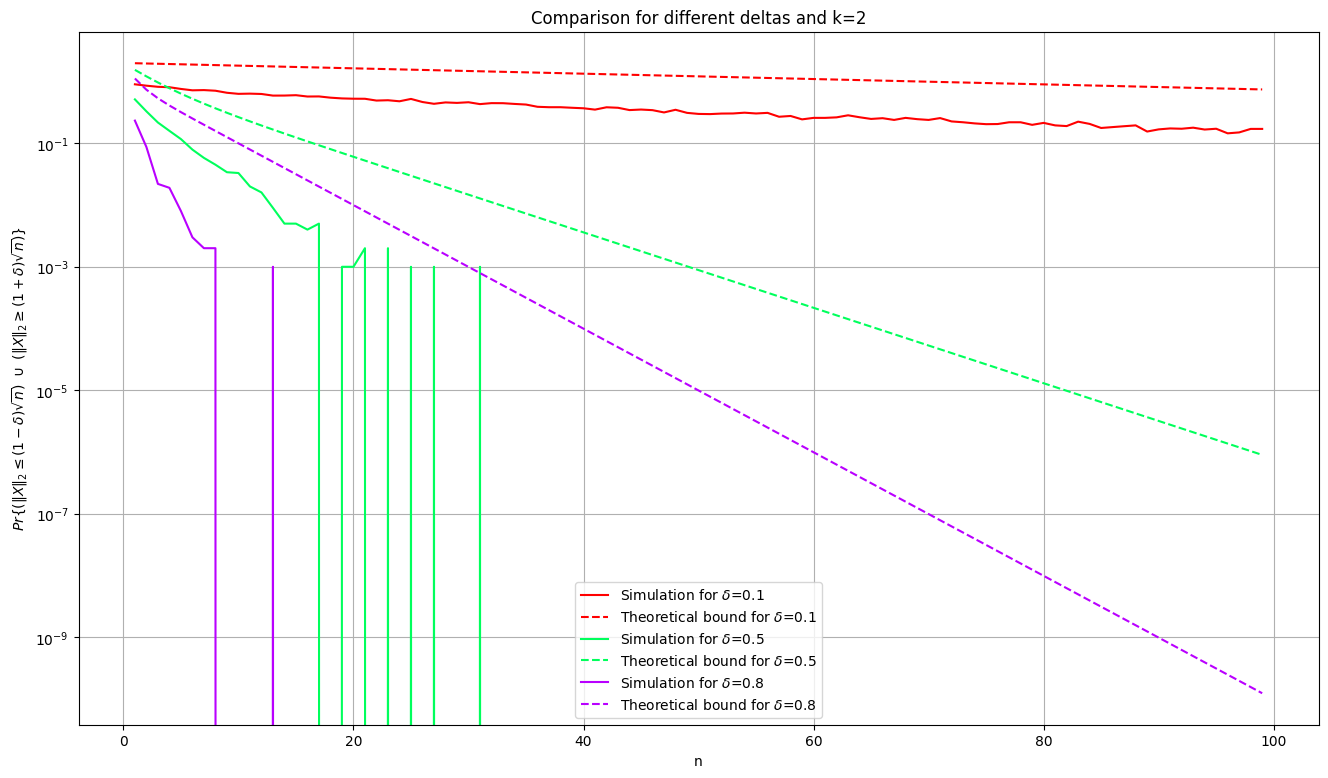

In [42]:
test_thin_shell([0.1, 0.5, 0.8], range(1, 100), 2)

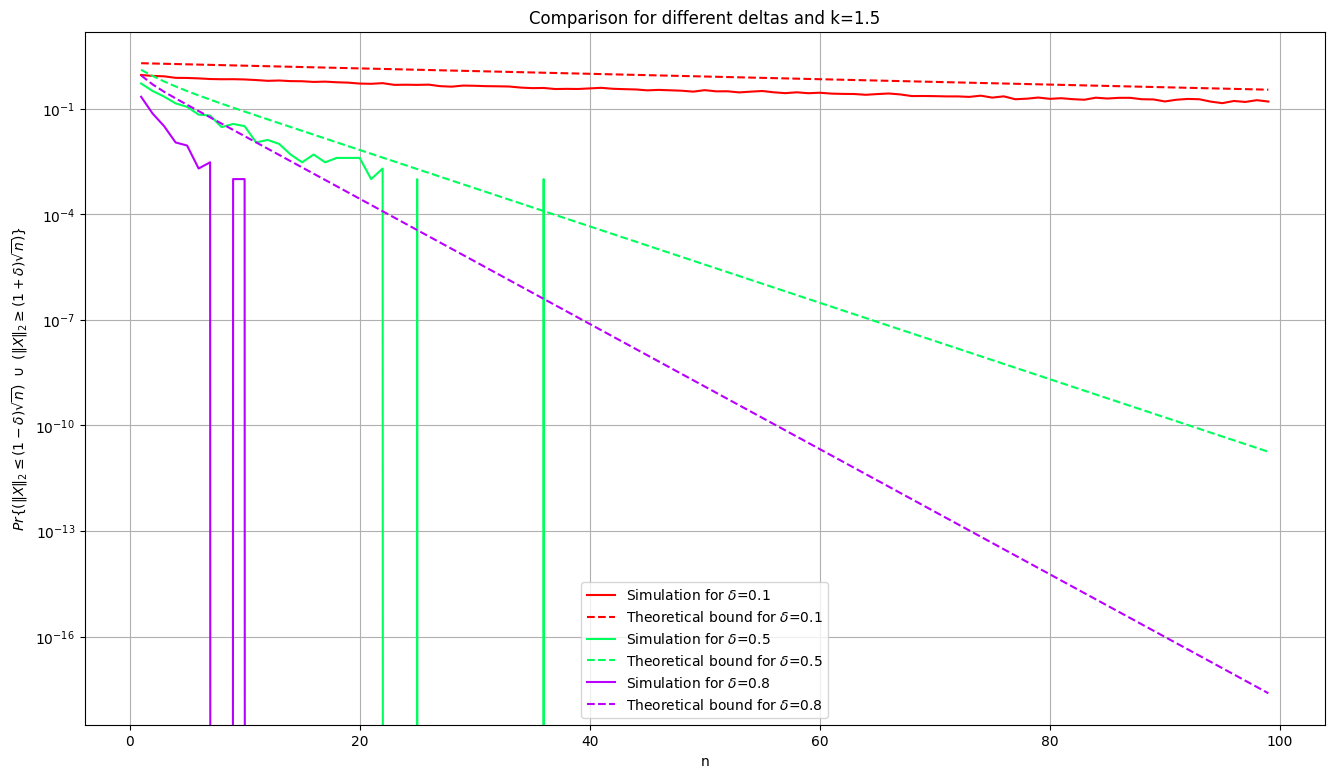

In [43]:
test_thin_shell([0.1, 0.5, 0.8], range(1, 100), 1.5)

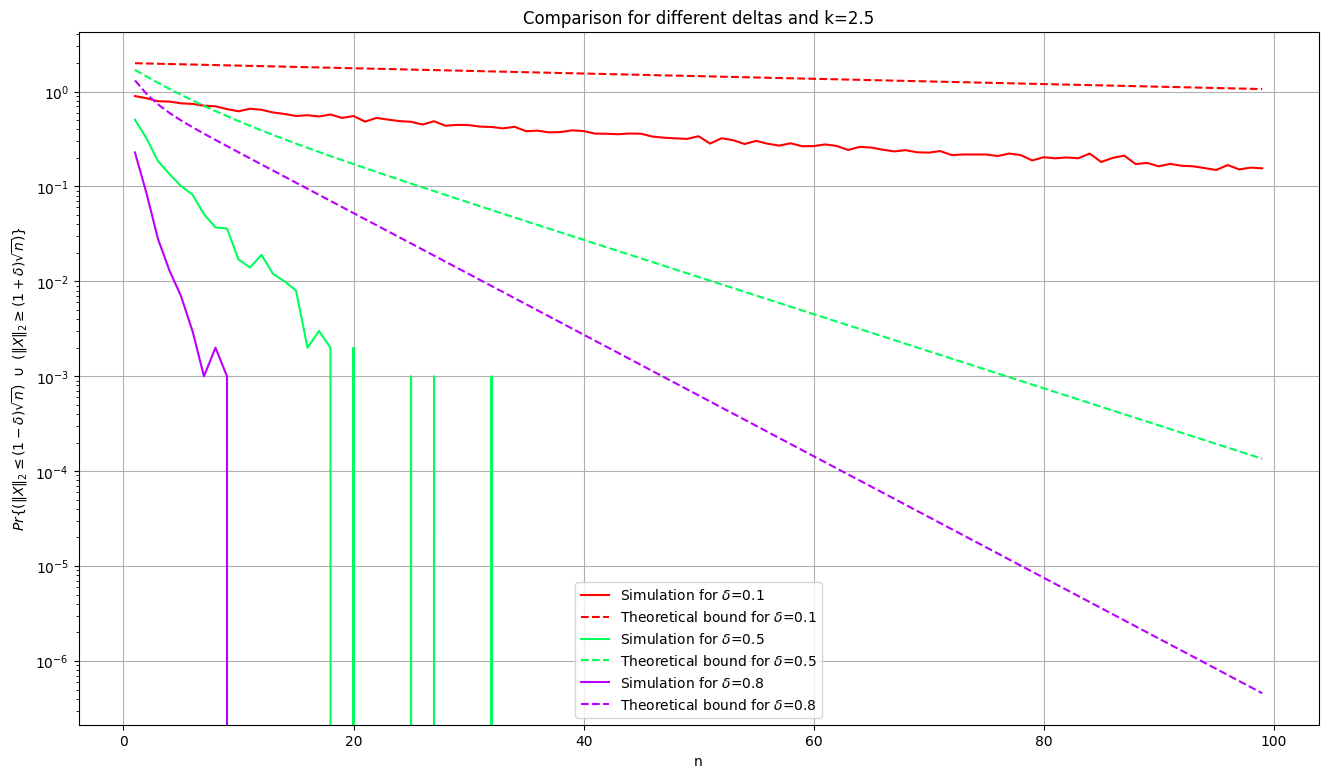

In [44]:
test_thin_shell([0.1, 0.5, 0.8], range(1, 100), 2.5)

I checked different values of k by myself and come to the conclusion, that the higher the k, the wider upper bound is, however, if we'd take relatively small k, then we'd cross with experiment results. Thus I decide to take k=2 as the balance between this two situations.